In [ ]:
import pandas as pd

# Load the CSV files
train_bodies = pd.read_csv("/train_bodies.csv")
train_stances = pd.read_csv("/train_stances.csv")

# Merge the datasets based on the Body ID
merged_data = pd.merge(train_stances, train_bodies, on="Body ID")

# Remove unnecessary columns
merged_data.drop(columns=["Body ID"], inplace=True)

# Display the first few rows of the merged dataset to verify
print(merged_data.head())


                                            Headline     Stance  \
0  Police find mass graves with at least '15 bodi...  unrelated   
1           Seth Rogen to Play Apple’s Steve Wozniak    discuss   
2  Mexico police find mass grave near site 43 stu...  unrelated   
3  Mexico Says Missing Students Not Found In Firs...  unrelated   
4  New iOS 8 bug can delete all of your iCloud do...  unrelated   

                                         articleBody  
0  Danny Boyle is directing the untitled film\n\n...  
1  Danny Boyle is directing the untitled film\n\n...  
2  Danny Boyle is directing the untitled film\n\n...  
3  Danny Boyle is directing the untitled film\n\n...  
4  Danny Boyle is directing the untitled film\n\n...  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Count the number of instances for each stance
stance_counts = merged_data['Stance'].value_counts()

# Print the stance distribution
print("Stance Distribution:")
print(stance_counts)

# Calculate the percentage of each stance
stance_percentages = stance_counts / len(merged_data) * 100

# Print the percentage distribution
print("\nStance Percentage Distribution:")
print(stance_percentages)


Stance Distribution:
Stance
unrelated    36545
discuss       8909
agree         3678
disagree       840
Name: count, dtype: int64

Stance Percentage Distribution:
Stance
unrelated    73.130953
discuss      17.827984
agree         7.360122
disagree      1.680941
Name: count, dtype: float64


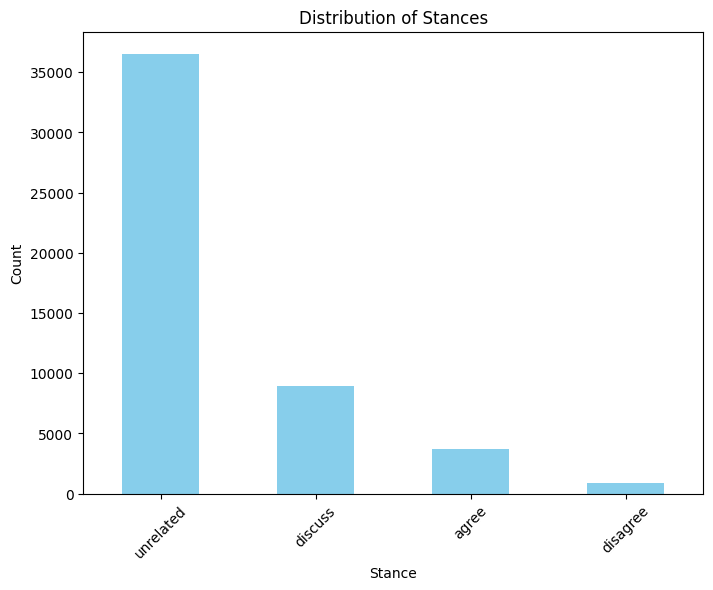

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of stances
plt.figure(figsize=(8, 6))
stance_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Stances')
plt.xlabel('Stance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


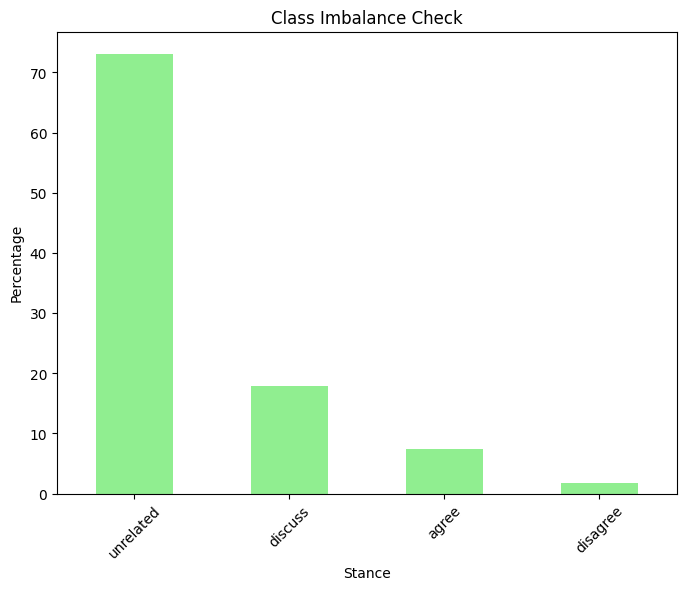

In [ ]:
# Plotting the class imbalance
plt.figure(figsize=(8, 6))
stance_percentages.plot(kind='bar', color='lightgreen')
plt.title('Class Imbalance Check')
plt.xlabel('Stance')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download necessary nltk resources

# Tokenize the text
merged_data['tokenized_headline'] = merged_data['Headline'].apply(word_tokenize)
merged_data['tokenized_body'] = merged_data['articleBody'].apply(word_tokenize)

# Display the first few rows to verify
print(merged_data[['Headline', 'tokenized_headline', 'articleBody', 'tokenized_body']].head())


                                            Headline  \
0  Police find mass graves with at least '15 bodi...   
1           Seth Rogen to Play Apple’s Steve Wozniak   
2  Mexico police find mass grave near site 43 stu...   
3  Mexico Says Missing Students Not Found In Firs...   
4  New iOS 8 bug can delete all of your iCloud do...   

                                  tokenized_headline  \
0  [Police, find, mass, graves, with, at, least, ...   
1  [Seth, Rogen, to, Play, Apple, ’, s, Steve, Wo...   
2  [Mexico, police, find, mass, grave, near, site...   
3  [Mexico, Says, Missing, Students, Not, Found, ...   
4  [New, iOS, 8, bug, can, delete, all, of, your,...   

                                         articleBody  \
0  Danny Boyle is directing the untitled film\n\n...   
1  Danny Boyle is directing the untitled film\n\n...   
2  Danny Boyle is directing the untitled film\n\n...   
3  Danny Boyle is directing the untitled film\n\n...   
4  Danny Boyle is directing the untitled film\

In [ ]:
# Lowercase the tokenized text
merged_data['lowercased_headline'] = merged_data['tokenized_headline'].apply(lambda x: [word.lower() for word in x])
merged_data['lowercased_body'] = merged_data['tokenized_body'].apply(lambda x: [word.lower() for word in x])

# Display the first few rows to verify
print(merged_data[['tokenized_headline', 'lowercased_headline', 'tokenized_body', 'lowercased_body']].head())


                                  tokenized_headline  \
0  [Police, find, mass, graves, with, at, least, ...   
1  [Seth, Rogen, to, Play, Apple, ’, s, Steve, Wo...   
2  [Mexico, police, find, mass, grave, near, site...   
3  [Mexico, Says, Missing, Students, Not, Found, ...   
4  [New, iOS, 8, bug, can, delete, all, of, your,...   

                                 lowercased_headline  \
0  [police, find, mass, graves, with, at, least, ...   
1  [seth, rogen, to, play, apple, ’, s, steve, wo...   
2  [mexico, police, find, mass, grave, near, site...   
3  [mexico, says, missing, students, not, found, ...   
4  [new, ios, 8, bug, can, delete, all, of, your,...   

                                      tokenized_body  \
0  [Danny, Boyle, is, directing, the, untitled, f...   
1  [Danny, Boyle, is, directing, the, untitled, f...   
2  [Danny, Boyle, is, directing, the, untitled, f...   
3  [Danny, Boyle, is, directing, the, untitled, f...   
4  [Danny, Boyle, is, directing, the, untitled

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the lowercased tokenized text
merged_data['no_stopwords_headline'] = merged_data['lowercased_headline'].apply(lambda x: [word for word in x if word not in stop_words])
merged_data['no_stopwords_body'] = merged_data['lowercased_body'].apply(lambda x: [word for word in x if word not in stop_words])

# Display the first few rows to verify
print(merged_data[['lowercased_headline', 'no_stopwords_headline', 'lowercased_body', 'no_stopwords_body']].head())


                                 lowercased_headline  \
0  [police, find, mass, graves, with, at, least, ...   
1  [seth, rogen, to, play, apple, ’, s, steve, wo...   
2  [mexico, police, find, mass, grave, near, site...   
3  [mexico, says, missing, students, not, found, ...   
4  [new, ios, 8, bug, can, delete, all, of, your,...   

                               no_stopwords_headline  \
0  [police, find, mass, graves, least, '15, bodie...   
1      [seth, rogen, play, apple, ’, steve, wozniak]   
2  [mexico, police, find, mass, grave, near, site...   
3  [mexico, says, missing, students, found, first...   
4      [new, ios, 8, bug, delete, icloud, documents]   

                                     lowercased_body  \
0  [danny, boyle, is, directing, the, untitled, f...   
1  [danny, boyle, is, directing, the, untitled, f...   
2  [danny, boyle, is, directing, the, untitled, f...   
3  [danny, boyle, is, directing, the, untitled, f...   
4  [danny, boyle, is, directing, the, untitled

In [ ]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the text
merged_data['lemmatized_headline'] = merged_data['no_stopwords_headline'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
merged_data['lemmatized_body'] = merged_data['no_stopwords_body'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Display the first few rows to verify
print(merged_data[['no_stopwords_headline', 'lemmatized_headline', 'no_stopwords_body', 'lemmatized_body']].head())


                               no_stopwords_headline  \
0  [police, find, mass, graves, least, '15, bodie...   
1      [seth, rogen, play, apple, ’, steve, wozniak]   
2  [mexico, police, find, mass, grave, near, site...   
3  [mexico, says, missing, students, found, first...   
4      [new, ios, 8, bug, delete, icloud, documents]   

                                 lemmatized_headline  \
0  [police, find, mass, graf, least, '15, body, '...   
1      [seth, rogen, play, apple, ’, steve, wozniak]   
2  [mexico, police, find, mass, grave, near, site...   
3  [mexico, say, missing, student, found, first, ...   
4        [new, io, 8, bug, delete, icloud, document]   

                                   no_stopwords_body  \
0  [danny, boyle, directing, untitled, film, seth...   
1  [danny, boyle, directing, untitled, film, seth...   
2  [danny, boyle, directing, untitled, film, seth...   
3  [danny, boyle, directing, untitled, film, seth...   
4  [danny, boyle, directing, untitled, film, s

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the data
train_bodies = pd.read_csv('/train_bodies.csv')
train_stances = pd.read_csv('/train_stances.csv')

# Merge the data on 'Body ID'
merged_data = pd.merge(train_stances, train_bodies, how='left', on='Body ID')

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Removing punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    # Converting to lowercase
    tokens = [word.lower() for word in tokens]
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to headline and body text
merged_data['preprocessed_headline'] = merged_data['Headline'].apply(preprocess_text)
merged_data['preprocessed_body'] = merged_data['articleBody'].apply(preprocess_text)

# Display the first few rows to verify
print(merged_data.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                            Headline  Body ID     Stance  \
0  Police find mass graves with at least '15 bodi...      712  unrelated   
1  Hundreds of Palestinians flee floods in Gaza a...      158      agree   
2  Christian Bale passes on role of Steve Jobs, a...      137  unrelated   
3  HBO and Apple in Talks for $15/Month Apple TV ...     1034  unrelated   
4  Spider burrowed through tourist's stomach and ...     1923   disagree   

                                         articleBody  \
0  Danny Boyle is directing the untitled film\n\n...   
1  Hundreds of Palestinians were evacuated from t...   
2  30-year-old Moscow resident was hospitalized w...   
3  (Reuters) - A Canadian soldier was shot at the...   
4  Fear not arachnophobes, the story of Bunbury's...   

                               preprocessed_headline  \
0  [police, find, mass, graf, least, '15, body, n...   
1  [hundred, palestinian, flee, flood, gaza, isra...   
2  [christian, bale, pass, role, steve

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=3031)  # Set max_features to match the number of features generated

# Fit and transform the preprocessed headline and body text
headline_tfidf = tfidf_vectorizer.fit_transform(merged_data['preprocessed_headline'].apply(lambda x: ' '.join(x)))
body_tfidf = tfidf_vectorizer.fit_transform(merged_data['preprocessed_body'].apply(lambda x: ' '.join(x)))

# Convert the TF-IDF matrices to pandas DataFrames for easier manipulation
headline_tfidf_df = pd.DataFrame(headline_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
body_tfidf_df = pd.DataFrame(body_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original dataframe
merged_data_with_tfidf = pd.concat([merged_data.drop(columns=['Headline', 'articleBody']), headline_tfidf_df, body_tfidf_df], axis=1)

# Display the first few rows to verify
print(merged_data_with_tfidf.head())


   Body ID     Stance                              preprocessed_headline  \
0      712  unrelated  [police, find, mass, graf, least, '15, body, n...   
1      158      agree  [hundred, palestinian, flee, flood, gaza, isra...   
2      137  unrelated  [christian, bale, pass, role, steve, job, acto...   
3     1034  unrelated  [hbo, apple, talk, 15/month, apple, tv, stream...   
4     1923   disagree    [spider, burrowed, tourist, 's, stomach, chest]   

                                   preprocessed_body  000   10  100   11   12  \
0  [danny, boyle, directing, untitled, film, seth...  0.0  0.0  0.0  0.0  0.0   
1  [hundred, palestinian, evacuated, home, sunday...  0.0  0.0  0.0  0.0  0.0   
2  [30-year-old, moscow, resident, hospitalized, ...  0.0  0.0  0.0  0.0  0.0   
3  [reuters, canadian, soldier, shot, canadian, w...  0.0  0.0  0.0  0.0  0.0   
4  [fear, arachnophobes, story, bunbury, 's, ``, ...  0.0  0.0  0.0  0.0  0.0   

    13  ...  yorkshire  you  young  younger  youngest  y

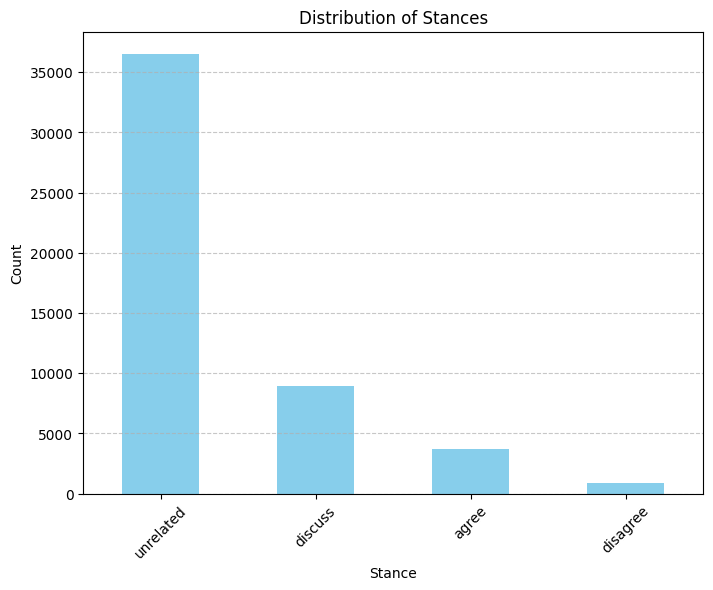

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each stance
stance_counts = merged_data['Stance'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
stance_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Stances')
plt.xlabel('Stance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report# Define features (X) and target variable (y)
X = merged_data_with_tfidf.drop(columns=['Stance', 'preprocessed_headline','preprocessed_body' ])
y = merged_data_with_tfidf['Stance']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


# tuning the random forest, but skip it for now

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                                   n_iter=50, scoring='accuracy', cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Train the model using the best hyperparameters
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

# Evaluate the model's performance on the test set
print(classification_report(y_test, best_model.predict(X_test)))


# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Evaluate the model's performance on the test set
print(classification_report(y_test, y_pred_test))

# Optionally, visualize the results using confusion matrix or other relevant plots
# For example, you can plot a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Initialize RFE with RandomForestClassifier as the estimator
rfe = RFE(estimator=rf_classifier, n_features_to_select=100, step=50)

# Fit RFE to our training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Filter the training and testing data to include only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train the classifier on the selected features
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the testing data
y_pred_selected = rf_classifier.predict(X_test_selected)

# Evaluate the model
print(classification_report(y_test, y_pred_selected))


# XGBoost, but skip it for now

In [ ]:
# Define features (X) and target variable (y)

X = merged_data_with_tfidf.drop(columns=['Stance', 'preprocessed_headline', 'preprocessed_body'])
y = merged_data_with_tfidf['Stance']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [ ]:
import xgboost as xgb




# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the training data
xgb_classifier.fit(X_train_encoded, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = xgb_classifier.predict(X_test_encoded)

# Decode the numerical predictions back to categorical labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


# tuning xgb

# SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train_encoded, y_train)

# Make predictions on the testing data
y_pred_svm = svm_classifier.predict(X_test_encoded)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


NameError: name 'X_train_encoded' is not defined

In [ ]:
# SVM tuning

In [ ]:
# Ensemble models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rf = rf_classifier.predict(X_test_encoded)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))



# Combining ensemble methods

# next steps
# Feature Selection
# Regularization